# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

C:\Users\jinve\anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


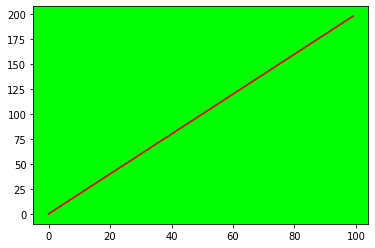

C:\Users\jinve\anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


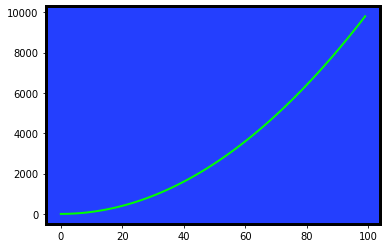

In [3]:
# Method 1
plt.plot(x,y)

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 3

ax = plt.axes()

ax.set_facecolor("lime")

plt.plot(x,y,'r')

plt.show()

plt.plot(x,z,'lime',linewidth=2)
ax = plt.axes()
ax.set_facecolor("#243ffe")


plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

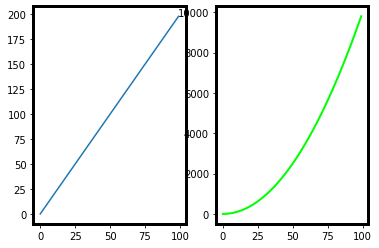

In [4]:
# Method 2
f , (a1,a2) = plt.subplots(nrows = 1, ncols = 2)

a1.plot(x,y)
a2.plot(x,z,'lime',linewidth=2)

plt.show()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

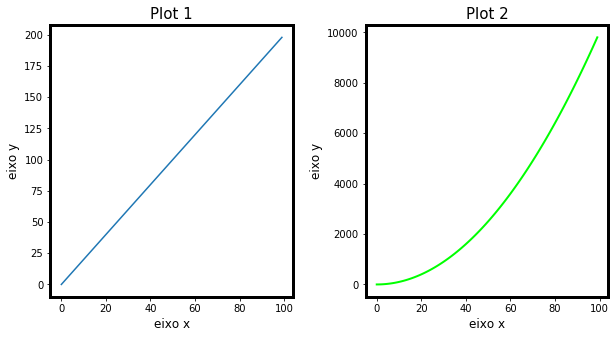

In [5]:
f , (a1,a2) = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))

a1.plot(x,y)
a2.plot(x,z,'lime',linewidth=2)

a1.set_xlabel('eixo x',fontsize=12)
a1.set_ylabel('eixo y',fontsize=12)
a1.set_title('Plot 1',fontsize=15)

a2.set_xlabel('eixo x',fontsize=12)
a2.set_ylabel('eixo y',fontsize=12)
a2.set_title('Plot 2',fontsize=15)

plt.subplots_adjust(wspace = 0.3) # To adjust the space between sub plots

plt.show()

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

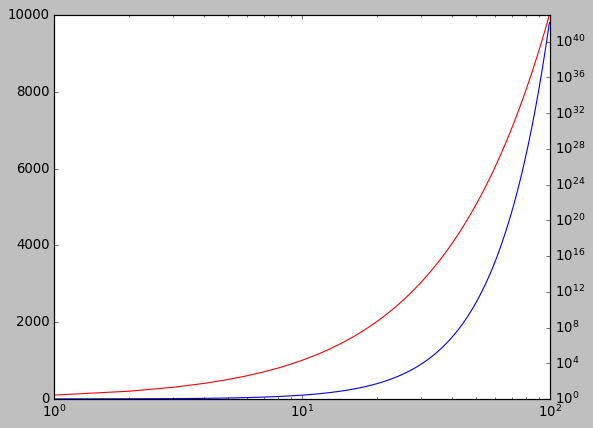

In [59]:
y=x**2
y2 = np.exp(x)

ax1=plt.plot(y)


ax2=plt.twinx()

ax2.plot(y2, c="r")
ax2.set_yscale('log')
ax2.set_xscale('log')

plt.show()


#### As a bonus challenge, try to add a legend to the plot.

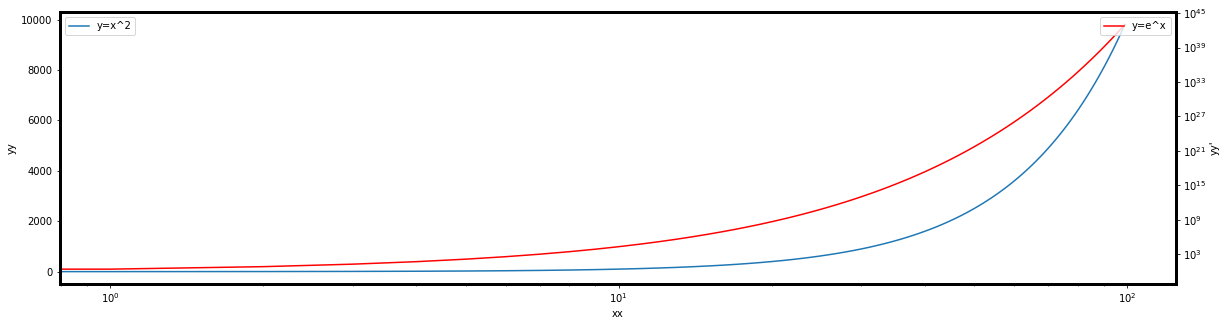

In [7]:
plt.figure(figsize = (20,5))
y=x**2
y2 = np.exp(x)

ax1=plt.plot(y,label="y=x^2")


plt.ylabel('yy')
plt.xlabel('xx')

plt.legend(loc="upper left")

ax2=plt.twinx()

ax2.plot(y2, c="r", label="y=e^x")
ax2.set_yscale('log')
ax2.set_xscale('log')

plt.ylabel("yy'")
plt.legend(loc="upper right")

plt.show()


## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [8]:
fitbit=pd.read_csv("Fitbit2.csv")
fitbit.head(3)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

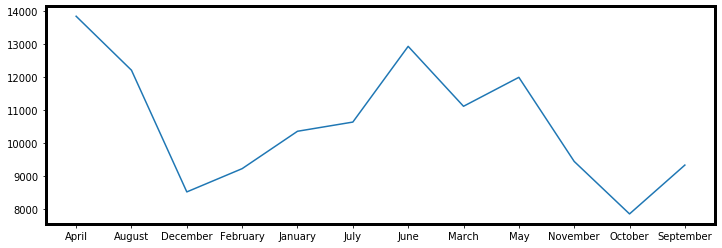

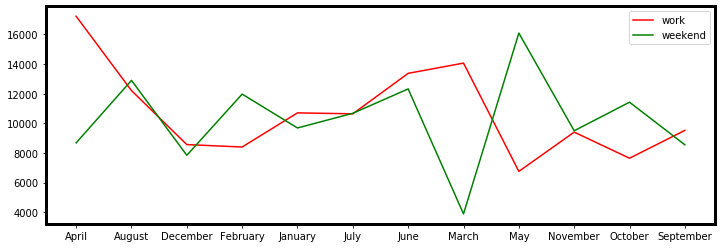

In [9]:
# MEDIAN STEPS BY MONTH_ENCODED
cha2=fitbit.groupby(by = ['Months'])['Steps'].median()
cha2

plt.figure(figsize = (12,4))

plt.plot(cha2.index,cha2.values)

plt.show()

# MEDIAN STEPS BY WORK_OR_WEEKEND
cha2work=(fitbit[fitbit["Work_or_Weekend"]==1]).groupby(by = ["Months"])["Steps"].median()
cha2wend=(fitbit[fitbit["Work_or_Weekend"]==0]).groupby(by = ["Months"])["Steps"].median()

plt.figure(figsize = (12,4))

plt.plot(cha2work.index,cha2work.values, label="work", c="r")
plt.plot(cha2wend.index,cha2wend.values, label="weekend", c="g")

plt.legend(loc="upper right")

plt.show()

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

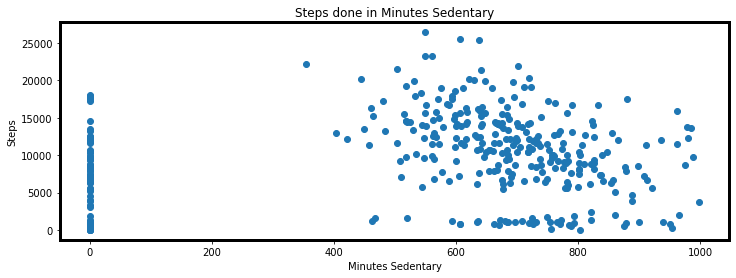

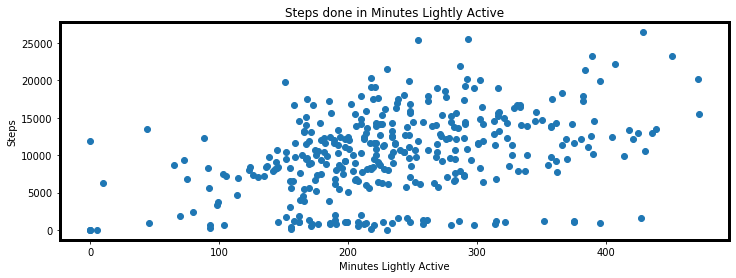

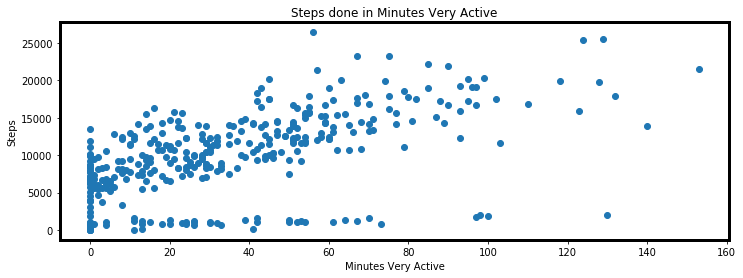

In [10]:
fitbit.head()

iterate=['Minutes Sedentary', 'Minutes Lightly Active','Minutes Very Active']

for i in iterate:
    plt.figure(figsize = (12,4))
    plt.scatter(fitbit[i],fitbit["Steps"])
    plt.title("Steps done in "+ i)
    plt.ylabel("Steps")
    plt.xlabel(i)    
    plt.show()

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [11]:
titanic=pd.read_csv("titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [12]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Gender       1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [13]:
# NUMERICAL VARIABLES
titanic.select_dtypes("number") 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [14]:
# CATEGORICAL VARIABLES
titanic.select_dtypes("object") 

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [15]:
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')
plt.figure(figsize = (12,6))

<Figure size 960x480 with 0 Axes>

<Figure size 960x480 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

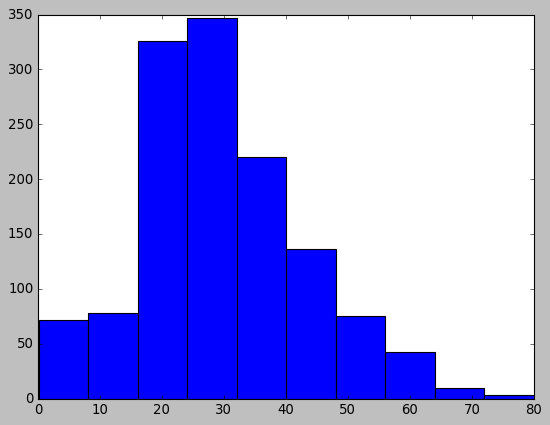

In [16]:
plt.hist(titanic["Age"],bins=10)
plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

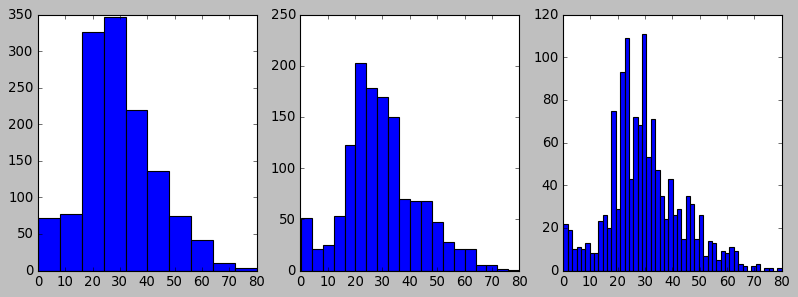

In [17]:
f , (c31,c32,c33) = plt.subplots(nrows = 1, ncols = 3, figsize = (12,4))
c31.hist(titanic["Age"],bins=10)
c32.hist(titanic["Age"],bins=20)
c33.hist(titanic["Age"],bins=50)
plt.show()

#### How does the bin size affect your plot?

In [18]:
"""
When increasing the number of bins the Y axis decreases because the ages are more distributed by the bins.
"""

'\nWhen increasing the number of bins the Y axis decreases because the ages are more distributed by the bins.\n'

#### Use seaborn to show the distribution of column `Age`.

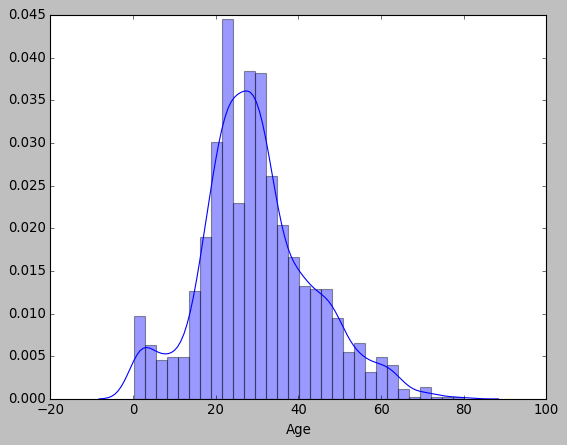

In [19]:
sb.distplot(titanic["Age"])

plt.show()

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

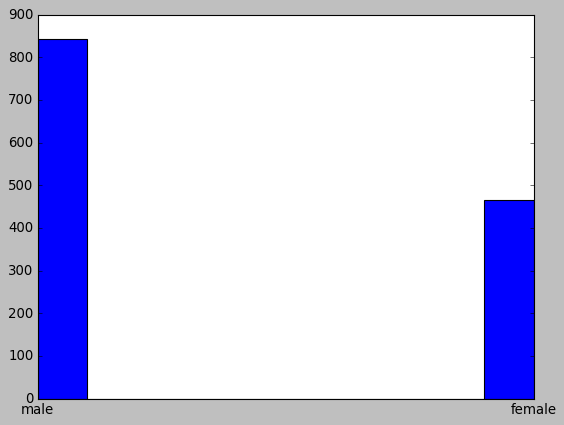

In [20]:
# Method 1 - matplotlib

plt.hist(titanic["Gender"])
plt.show()

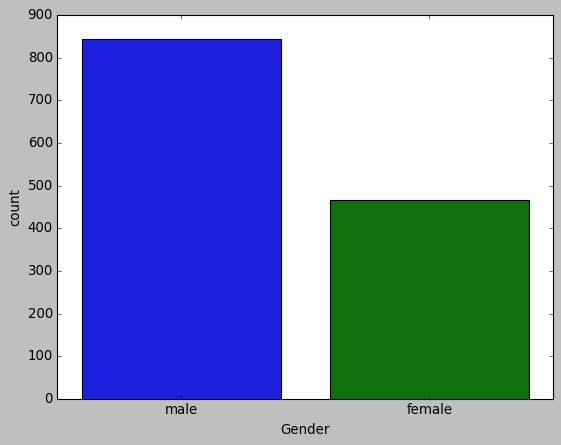

In [21]:
# Method 2 - seaborn

sb.countplot(titanic["Gender"])
plt.show()

#### Use the right plot to visualize the column `Pclass`.

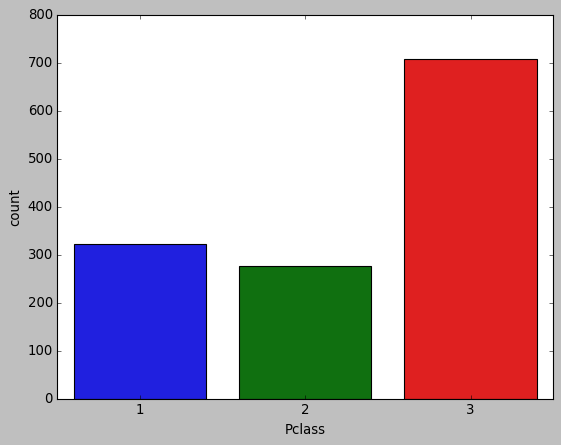

In [22]:
sb.countplot(titanic["Pclass"])
plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

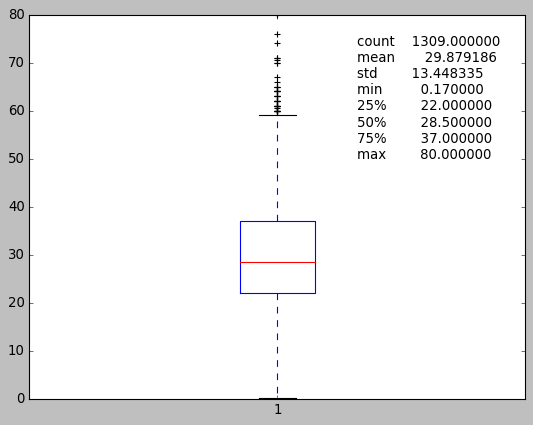

In [23]:
plt.boxplot(titanic["Age"])
plt.annotate((titanic["Age"]).describe().to_string(), (1.16,50))
plt.show()

In [24]:
"""
Box plot alows to see the limit os Q1 and Q3. The median in red.
It shows the maximum and minimum values and the outliers.
We can briefly understand the data.
"""

'\nBox plot alows to see the limit os Q1 and Q3. The median in red.\nIt shows the maximum and minimum values and the outliers.\nWe can briefly understand the data.\n'

#### What does the last plot tell you about the feature `Age`?

In [25]:
"""
Q1 limit at 25% is 22.
Q3 limit at 75% is 37.
Maximum is 80 and minimum is almost 1.
Media is around 28
"""

'\nQ1 limit at 25% is 22.\nQ3 limit at 75% is 37.\nMaximum is 80 and minimum is almost 1.\nMedia is around 28\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

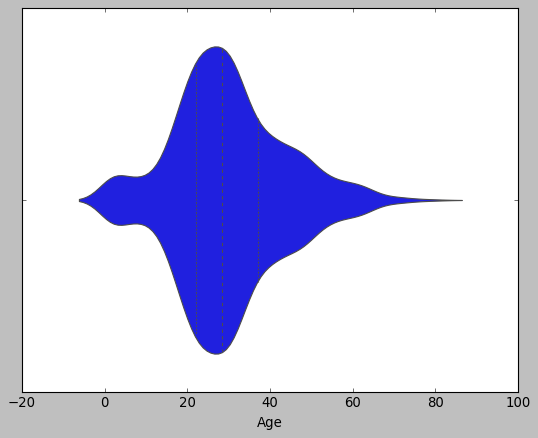

In [26]:
sb.violinplot(y='Age', data=titanic, orient='h', inner='quartile')
plt.show()

#### What additional information does the last plot provide about feature `Age`?

In [40]:
"""
We now know information of all population.
Q1 is mostly late teen to 20y, Q2 from 20 to 30, Q3 30 to 40 and Q4 is 40 to 50.
"""

'\nWe now know information of all population.\nQ1 is mostly late teen to 20y, Q2 from 20 to 30, Q3 30 to 40 and Q4 is 40 to 50.\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

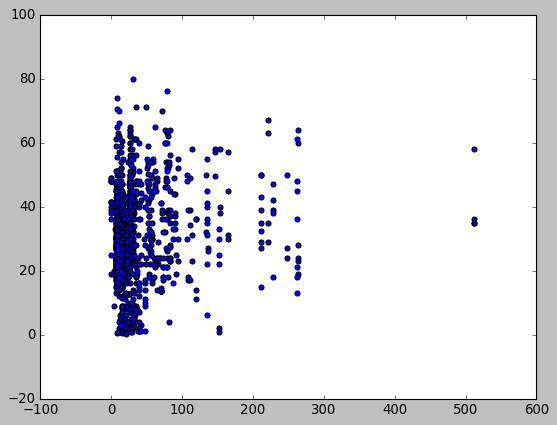

In [28]:
# Method 1 - matplotlib
plt.scatter(titanic["Fare"],titanic["Age"])
plt.show()

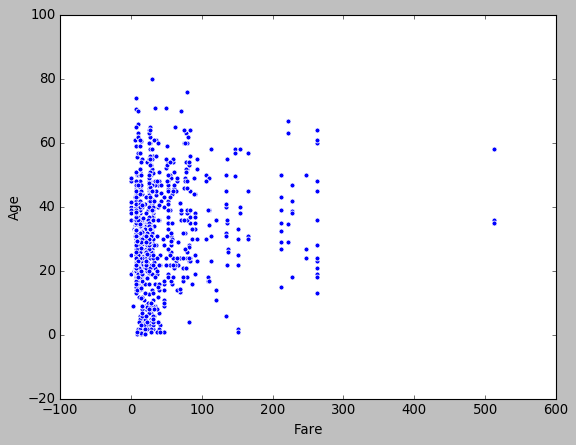

In [29]:
# Method 2 - seaborn
sb.scatterplot(titanic["Fare"],titanic["Age"])
plt.show()

#### Plot the correlation matrix using seaborn.

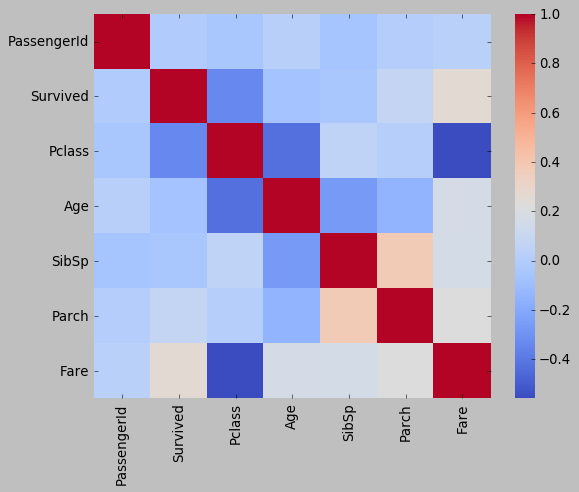

In [45]:
sb.heatmap(titanic.corr(),cmap='coolwarm')
plt.show()

#### What are the most correlated features?

In [ ]:
"""
Parch and Sibsp
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

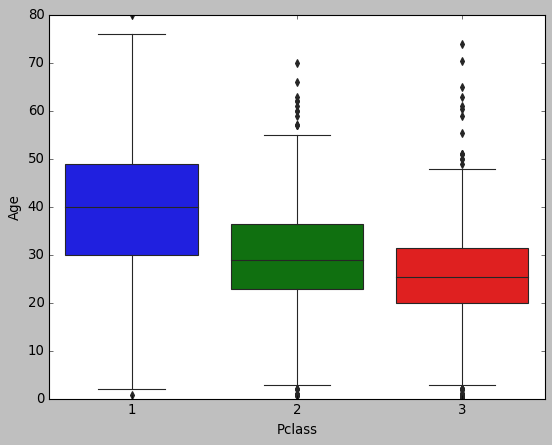

In [50]:
sb.boxplot(titanic["Pclass"], titanic["Age"])
plt.show()

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

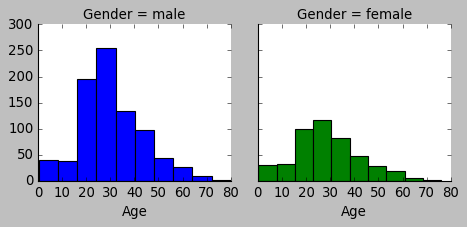

In [58]:
b=sb.FacetGrid(col='Gender', hue='Gender', data=titanic)
b= b.map(plt.hist, 'Age')
plt.show()